In [110]:
#Write an algorithm to find out where can aadhar card centre can be opened depending on the requirements using census data and nighttime data which consists of state name , district name where aadhar centre are already built



In [111]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import geopandas as gpd



In [112]:
#

In [113]:
from simpledbf import Dbf5

# Provide the full path to the DBF file if it's not in the same directory
dbf = Dbf5('aadhar_centers/unit_id.dbf')

# Convert DBF to DataFrame
df = dbf.to_dataframe()
print(df.head())  # Print the first few rows to verify

# Ensure the DataFrame has been created properly



       gid           state      lat     long
0  4233336     Maharashtra  17.0076  74.2615
1  4233337      Tamil Nadu  10.7886  79.1310
2  4233338       Karnataka  16.1655  74.8214
3  4233339  Andhra Pradesh  16.1849  81.1353
4  4233340         Tripura  23.9967  91.9957


In [114]:
#read the cpg file
cpg = open('aadhar_centers/unit_id.cpg', 'r')
print(cpg.read())


ISO-8859-1


In [115]:
# Read the shp file by using geopandas
shp = gpd.read_file('aadhar_centers/unit_id.shp')

# Print the head of the DataFrame to ensure it's been read properly
print(shp.head())


       gid           state      lat     long                   geometry
0  4233336     Maharashtra  17.0076  74.2615  POINT (74.26150 17.00760)
1  4233337      Tamil Nadu  10.7886  79.1310  POINT (79.13100 10.78860)
2  4233338       Karnataka  16.1655  74.8214  POINT (74.82140 16.16550)
3  4233339  Andhra Pradesh  16.1849  81.1353  POINT (81.13530 16.18490)
4  4233340         Tripura  23.9967  91.9957  POINT (91.99570 23.99670)


In [116]:
# Read the shx file by using geopandas
shx = gpd.read_file('aadhar_centers/unit_id.shx')

# Print the head of the DataFrame to ensure it's been read properly
print(shx.head())


       gid           state      lat     long                   geometry
0  4233336     Maharashtra  17.0076  74.2615  POINT (74.26150 17.00760)
1  4233337      Tamil Nadu  10.7886  79.1310  POINT (79.13100 10.78860)
2  4233338       Karnataka  16.1655  74.8214  POINT (74.82140 16.16550)
3  4233339  Andhra Pradesh  16.1849  81.1353  POINT (81.13530 16.18490)
4  4233340         Tripura  23.9967  91.9957  POINT (91.99570 23.99670)


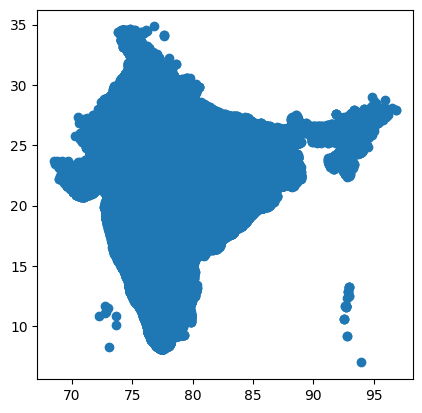

In [117]:
#plotting the shape file
shp.plot()
plt.show()


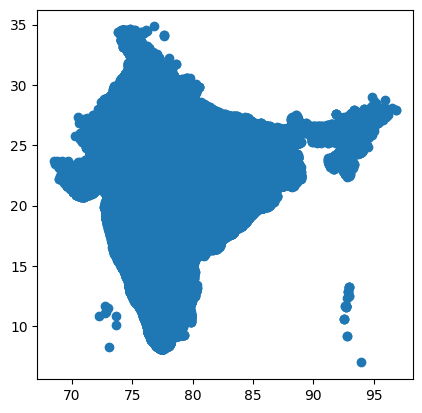

In [118]:
#plot the shx file
shx.plot()
plt.show()

In [119]:
#data cleaning
#checking for null values
print(df.isnull().sum())

#checking for duplicate values
print(df.duplicated().sum())

#checking for unique values
print(df.nunique())



gid      0
state    0
lat      0
long     0
dtype: int64
0
gid      75038
state       36
lat      59834
long     57572
dtype: int64


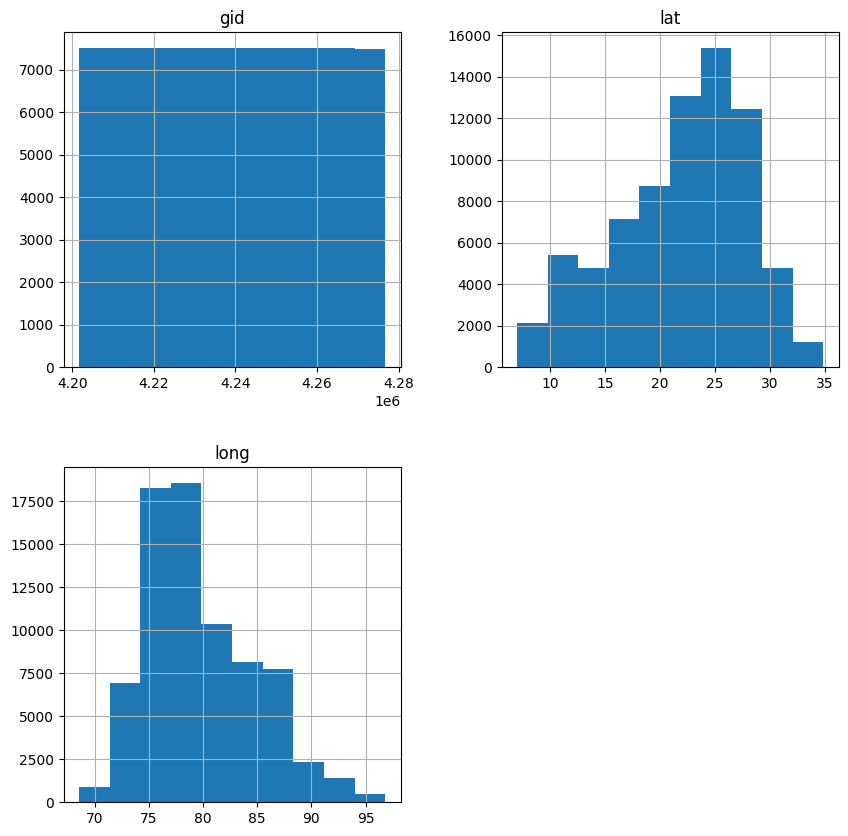

In [120]:
#data visualization
#plotting the histogram
df.hist(figsize=(10,10))
plt.show()


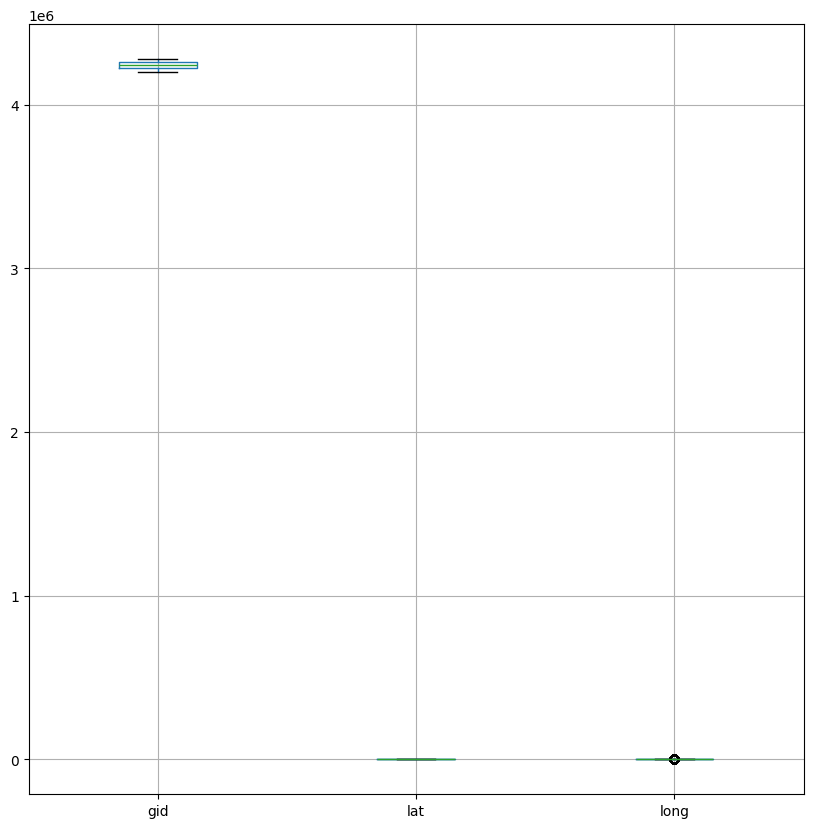

In [121]:
#plotting the boxplot
df.boxplot(figsize=(10,10))
plt.show()

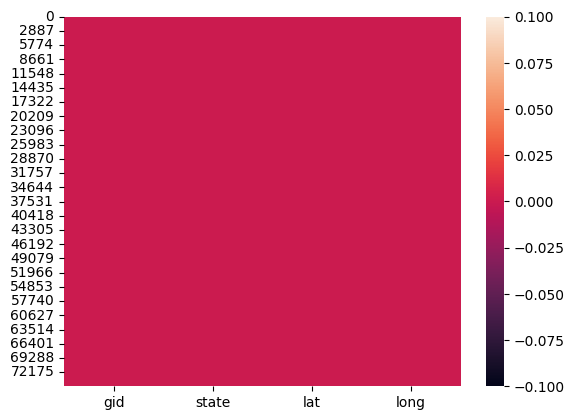

In [122]:
#plot the heatmap
sns.heatmap(df.isnull())
plt.show()

In [123]:
#show columns
print(df.columns)


Index(['gid', 'state', 'lat', 'long'], dtype='object')


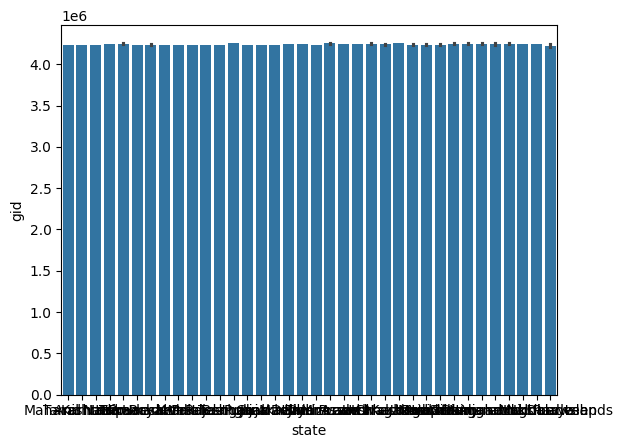

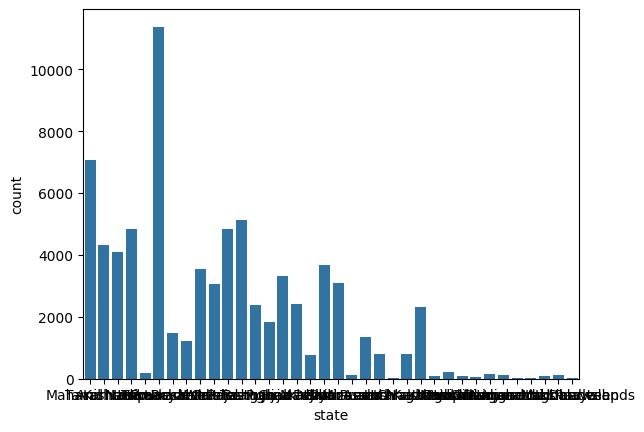

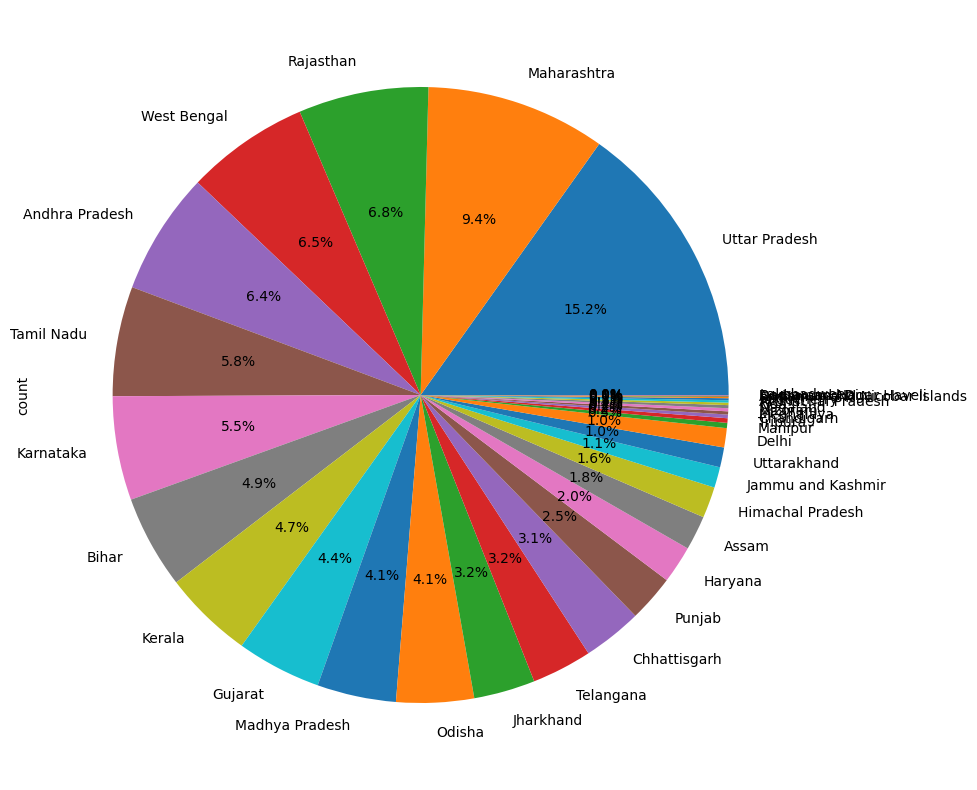

In [124]:
#proximity analysis state wise
#plotting the barplot
sns.barplot(x='state',y='gid',data=df)
plt.show()

#plotting the countplot
sns.countplot(x='state',data=df)
plt.show()

#plotting the piechart
df['state'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,10))
plt.show()



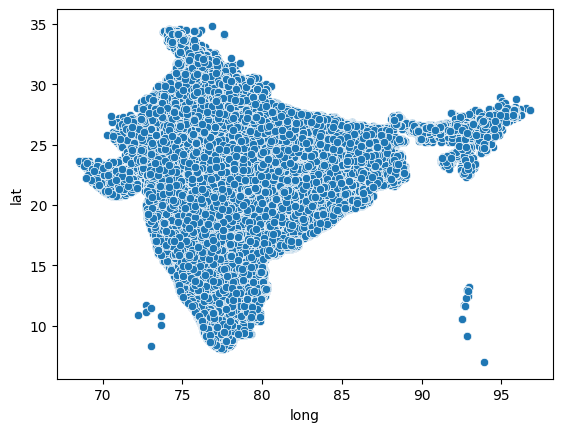

In [125]:


sns.scatterplot(x='long',y='lat',data=df)
plt.show()

In [126]:
#data slicing
#slicing the data
df1=df.iloc[:,1:3]
print(df1.head())


            state      lat
0     Maharashtra  17.0076
1      Tamil Nadu  10.7886
2       Karnataka  16.1655
3  Andhra Pradesh  16.1849
4         Tripura  23.9967


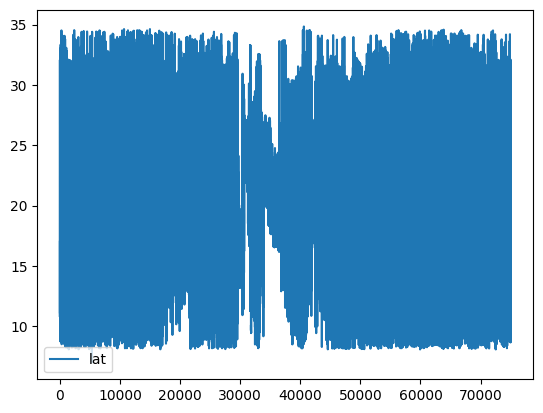

In [127]:
#plt the sliced data
df1.plot()
plt.show()


In [128]:
# Assuming 'df' contains categorical columns like 'state'
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())

# Combine numerical and encoded categorical data for clustering
numeric_df = df.select_dtypes(include=['number'])
final_df = pd.concat([numeric_df, encoded_df], axis=1)


In [129]:
#model building
#finding the optimum number of clusters for k-means classification
# from sklearn.cluster import KMeans
# wcss=[]
# for i in range(1,11):
#     kmeans=KMeans(n_clusters=i,init='k-means++')
#     kmeans.fit(df1)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title('the elbow method')
# plt.xlabel('number of clusters')
# plt.ylabel('wcss')
# plt.show()


In [130]:
#convert string to float state
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['state']=le.fit_transform(df['state'])
print(df['state'].head())


0    20
1    30
2    16
3     1
4    32
Name: state, dtype: int32


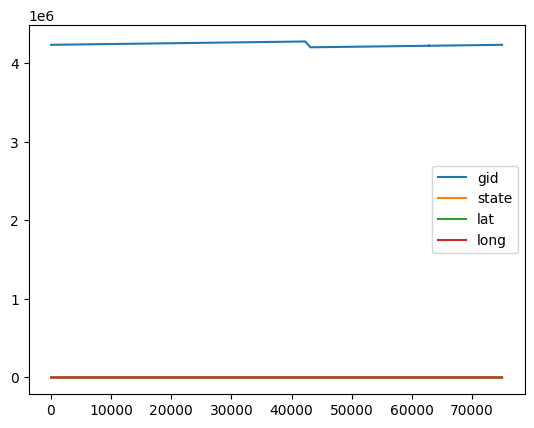

In [131]:
#plot the madhya pradesh state
df[df['state']==15].plot()
plt.show()

In [132]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:3].values
y=df.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [133]:
#fitting the k-means to the dataset
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x_test)


g:\SIF\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
#fitting the hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_test)


g:\SIF\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


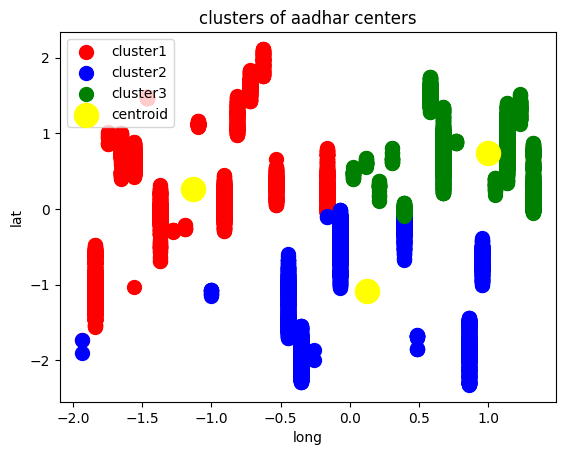

In [135]:
#visualizing the clusters
plt.scatter(x_test[y_kmeans==0,0],x_test[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x_test[y_kmeans==1,0],x_test[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x_test[y_kmeans==2,0],x_test[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title('clusters of aadhar centers')
plt.xlabel('long')
plt.ylabel('lat')
plt.legend()
plt.show()


In [136]:
#apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)


[0.5812897 0.4187103]


In [137]:
# #applying random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
# classifier.fit(x_train,y_train)


# #predicting the test set results
# y_pred=classifier.predict(x_test)



In [138]:
unique_labels_train = set(tuple(label) for label in y_train)
unique_labels_test = set(tuple(label) for label in y_test)

unseen_labels = unique_labels_test - unique_labels_train

print("Unseen labels in test set:", unseen_labels)


TypeError: 'numpy.int64' object is not iterable

In [139]:
# Splitting the data into training and testing data
data_set = train_test_split(x, y, test_size=0.2, random_state=32)


In [140]:
#define X_test
X_test = x_test
print(X_test)



[[-0.78621688  0.16418796]
 [-1.26868665  0.33914487]
 [ 0.39834816  0.2968703 ]
 ...
 [ 0.67605958  0.57458172]
 [ 1.32964283  0.70222363]
 [-0.26023851 -0.4932017 ]]


In [141]:
# X_test = X_test[~y_test.isin(unseen_labels)]
# y_test = y_test[~y_test.isin(unseen_labels)]


In [142]:
# unseen_label_indices = [i for i, label in enumerate(y_test) if tuple(label) in unseen_labels]
# y_test = [label for i, label in enumerate(y_test) if i not in unseen_label_indices]
# X_test = np.delete(X_test, unseen_label_indices, axis=0)


In [143]:
#define y_train and y_test
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


In [144]:
# #XGBoost Classifier
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# from xgboost import XGBClassifier
# classifier=XGBClassifier()
# classifier.fit(x_train,y_train)
# y_pred_encoded = classifier.predict(x_test)
# y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [145]:
# #splitting the data into training and testing data
# from sklearn.model_selection import train_test_split
# x=df.iloc[:,1:3].values
# # y=df.iloc[:,0].values
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [146]:
# #data labeling
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# print(y_train_encoded)
# print(y_test_encoded)


In [147]:
# #drop the gid column
# df=df.drop(['gid'],axis=1)
# print(df.head())



In [148]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Train the model in batches
batch_size = 1000
for i in range(0, len(x_train), batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = y_train_encoded[i:i+batch_size]
    mlp.partial_fit(x_batch, y_batch, classes=np.unique(y_train_encoded))


In [149]:
batch_size = 1000  # Adjust the batch size based on your available memory
num_samples = x_test.shape[0]
num_batches = num_samples // batch_size

# Predict in batches
y_pred_encoded = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    y_pred_batch = mlp.predict(x_test[start_idx:end_idx])
    y_pred_encoded.append(y_pred_batch)

# Concatenate the results
y_pred_encoded = np.concatenate(y_pred_encoded)


In [150]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)

In [151]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Train the model in batches
batch_size = 1000
for i in range(0, len(x_train), batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = y_train_encoded[i:i+batch_size]
    mlp.partial_fit(x_batch, y_batch, classes=np.unique(y_train_encoded))


In [152]:
print(y_test_encoded.shape)
print(y_pred_encoded.shape)


(0,)
(15000,)


In [153]:
# Example reshaping if needed
y_test_encoded = y_test_encoded.flatten()


In [154]:
import tensorflow as tf

In [169]:
# data_set structure
(x_train, y_train1, y_train2) = data_set


ValueError: too many values to unpack (expected 3)

In [170]:
print(data_set)


[array([[16.    , 14.3413],
       [16.    , 12.7603],
       [34.    , 29.5383],
       ...,
       [33.    , 27.1966],
       [16.    , 13.0799],
       [28.    , 28.0287]]), array([[31.    , 18.8943],
       [20.    , 18.6318],
       [20.    , 21.3282],
       ...,
       [11.    , 22.5808],
       [ 3.    , 26.3514],
       [19.    , 23.6171]]), array([4208562, 4262235, 4204195, ..., 4253687, 4218718, 4244271],
      dtype=int64), array([4272202, 4237917, 4258097, ..., 4247619, 4214775, 4230323],
      dtype=int64)]


In [168]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Assuming you have already loaded your training data into x_train and y_train

# Build the model
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(244, 244, 2)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="sigmoid")
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming your y_train is in the shape (60030, )
# If not, you might need to reshape it
# y_train = y_train.reshape(-1, 1)

# Train the model
History = cnn.fit(x_train, y_train, epochs=7, verbose=1, validation_data=data_set)


ValueError: Data is expected to be in format `x`, `(x,)`, `(x, y)`, or `(x, y, sample_weight)`, found: (array([[16.    , 14.3413],
       [16.    , 12.7603],
       [34.    , 29.5383],
       ...,
       [33.    , 27.1966],
       [16.    , 13.0799],
       [28.    , 28.0287]]), array([[31.    , 18.8943],
       [20.    , 18.6318],
       [20.    , 21.3282],
       ...,
       [11.    , 22.5808],
       [ 3.    , 26.3514],
       [19.    , 23.6171]]), array([4208562, 4262235, 4204195, ..., 4253687, 4218718, 4244271],
      dtype=int64), array([4272202, 4237917, 4258097, ..., 4247619, 4214775, 4230323],
      dtype=int64))

In [156]:
# Import the necessary libraries
from tensorflow.compat.v1 import train
from keras.optimizers import Adam  # Replace YourOptimizer with the actual optimizer you are using

# Example: Replace tf.train.Optimizer with tf.compat.v1.train.Optimizer
your_optimizer = Adam()

# Continue with the rest of your code


In [157]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 122, 122, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 119072)            0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [158]:
# Compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [161]:
accuracy_scores = []
batch_size = 1000
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size
print(num_batches)


60


In [162]:
#cnn.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1)
# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = (i + 1) * batch_size
#     x_batch = x_train[start_idx:end_idx]
#     y_batch = y_train[start_idx:end_idx]
cnn.fit(x_batch, y_batch, epochs=10, batch_size=1000, verbose=1)
accuracy_scores.append(cnn.evaluate(x_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "g:\SIF\venv\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "g:\SIF\venv\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "g:\SIF\venv\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "g:\SIF\venv\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "g:\SIF\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "g:\SIF\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 244, 244, 3), found shape=(None, 2)
